# Simple Machine Learning for Style classification

### ...using Scikit-Learn (RFC, SVMs, Neural Networks, KNN, SGD)

### Import Packages :

In [1]:
# loading files
import pickle
import pandas as pd
import seaborn as sns
import os
import csv
# numpy
import numpy as np
from itertools import chain
# machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
# some libraries for result evaluation and visualization
from sklearn.metrics import confusion_matrix, classification_report
# rendering values to input data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# My modules
from NetworkX_GraphTranslation import CentralityPoint2D as cepo
from NetworkX_GraphTranslation import getKeyByValue
from AutoHarmonicAnalysis import GraphOfNewPiece
from GraphTrajectoryClass import *

### Delcare Functions and Construct DATA

We create a dictionary with all the file Names, it's going to be implementated in a file later on (Note all the styles already categorized are below)

Load function and Create Dictionaries

In [2]:
def loadDict(file_name) :
    complete_name = 'Comparison_Results/GraphDictionaries_TrajectoryV1/' + file_name + '.dictionary'
    graphDict = pickle.load( open( complete_name, "rb" ) )
    return graphDict

def composerPointsDict(method) :
    scikit_datalist = 'scikit_datalist'
    dictOfComposerPoints_mix4 = dict()
    for composer, file_name in nameDict.items() :
        datalist = []
        for graph in loadDict(file_name).values() :
            x, y, z = cepo(graph, 3, method)
            datalist.append([[composer],[x, y, z]])
    datalist = np.array(datalist)
    pickle.dump( dictOfComposerPoints_mix4, open( "Comparison_Results/GraphDictionaries_TrajectoryV1/"+ scikit_datalist + ".pkl", "wb" ) )

### Store all data to an object

In [3]:
def composerClassGraphs() :
    scikit_datalist = 'scikit_datalist'
    datalist = []
    for composer, file_name in nameDict.items() :
        for graph in loadDict(file_name).values() :
            graphcls = GraphClass(graph)
            datalist.append([composer, graphcls])
    datalist = np.array(datalist)
    pickle.dump( datalist, open( "Comparison_Results/GraphDictionaries_TrajectoryV1/"+ scikit_datalist + ".pkl", "wb" ) )
    
def transformFilesFromDirToList(directory) :
    datalist = []
    for file in os.listdir(directory):
        if file.endswith(".p") :
            complete_name = directory + '/' + file
            print('Rendering --> ', file)
            datalist.append(pickle.load( open( complete_name, "rb" ) ))
    return datalist

def composerPointsDict2List(composerPointsDict) :
    nl = [['COMPOSER', 'Kaltz Centrality', 'Global Clustering', 'Square Clustering', 'STYLE', 'HARMONY']]
    for composer, points in composerPointsDict.items() :
        print([composer, len(points)])
        if composer == 'bach' or composer == 'monteverdi' :
            style = 'barok'
            harmony = 'modal'
        elif composer == 'palestrina' :
            style = 'medieval'
            harmony = 'modal'
        elif composer == 'jazz' :
            style = 'jazz'
            harmony = 'chromatic'
        elif composer == 'chopin' :
            style = 'classical'
            harmony = 'chomatic'
        else :
            style = 'classical'
            harmony = 'classic'
            
        if composer == 'palestrina' :
            for index, point in enumerate(points) :
                if index < 60 :
                    x, y, z = point
                    nl.append([composer, x, y, z])
#                     nl.append([composer, x, y, z, style, harmony])
        else : 
            for point in points :
                x, y, z = point
                nl.append([composer, x, y, z])
#                 nl.append([composer, x, y, z, style, harmony])
    return np.array(nl)


def graphList2values(graphList) :
    nl = [['Composer', 'Name', 'Style', 'Harmony', 'Kalz Centrality', 'Global Clustering', 'Square Clustering', 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz']] #, 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz']]
    for graph in graphList :
        nl.append([graph.composer, graph.name, graph.style, graph.harmony, graph.kalz_coef, graph.glob_clust_coef, graph.square_clustering_coef, graph.harmonic_coef, graph.betweenness_coef, graph.closeness_coef, graph.trajectory.Tonnetz])
    return np.array(nl)

def write2csv(directory, file_name,  data):
    directory = directory + '/' + file_name + '.csv'
    with open(directory, 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(data)
    csvFile.close()
    
def graphsList2values(graphList) :
    nl1 = [['Composer', 'Name', 'Style', 'Trajectory Type', 'Kalz Centrality', 'Global Clustering', 'Square Clustering', 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz', 'Instruments', 'Number Of Instr', 'Tempo', 'Time Signature']]
    nl2 = [['Composer', 'Name', 'Style', 'Trajectory Type', 'Kalz Centrality', 'Global Clustering', 'Square Clustering', 'Harmonic Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Tonnetz', 'Instruments', 'Number Of Instr', 'Tempo', 'Time Signature']]
    for graphs in graphList :
        graph, graphRec = graphs
        nl1.append([graph.composer, graph.name, graph.style, graph.trajectory.type, graph.kalz_coef, graph.glob_clust_coef, graph.square_clustering_coef, graph.harmonic_coef, graph.betweenness_coef, graph.closeness_coef, graph.trajectory.Tonnetz, graph.trajectory.instruments, graph.trajectory.numOfInstr, graph.trajectory.tempo, graph.trajectory.time_signature_changes])
        nl2.append([graphRec.composer, graph.name, graphRec.style, graphRec.trajectory.type, graphRec.kalz_coef, graphRec.glob_clust_coef, graphRec.square_clustering_coef, graphRec.harmonic_coef, graphRec.betweenness_coef, graphRec.closeness_coef, graphRec.trajectory.Tonnetz, graphRec.trajectory.instruments, graphRec.trajectory.numOfInstr, graphRec.trajectory.tempo, graphRec.trajectory.time_signature_changes])
    return np.array(nl1), np.array(nl2)

In [335]:
graphlist = transformFilesFromDirToList('Comparison_Results/GraphObjects_new')
graphList = []
for listOfGraphs in graphlist :
    graphList += listOfGraphs 
graphArray = np.array(graphList)

valueList1, valueList2 = graphsList2values(graphArray)

write2csv('Comparison_Results/GraphObjects_new', 'datalist_trajectory_future', valueList1)
write2csv('Comparison_Results/GraphObjects_new', 'datalist_trajectory_recursive', valueList2)

Rendering -->  monteverdi.p
Rendering -->  palestrina.p


# Read Files - Begin { Prediction }

In [336]:
data = pd.read_csv('Comparison_Results/GraphObjects_new/datalist_trajectory_future.csv', sep = ',')
# data = pd.read_csv('Comparison_Results/GraphObjects_new/datalist_trajectory_recursive.csv', sep = ',')
data.head()

,Composer,Name,Style,Trajectory Type,Kalz Centrality,Global Clustering,Square Clustering,Harmonic Centrality,Betweenness Centrality,Closeness Centrality,Tonnetz,Instruments,Number Of Instr,Tempo,Time Signature
0,monteverdi,madrigal.3.1,renaissance,Trajectory With Future,0.139499,0.289683,0.356335,17.097605,0.100345,0.079668,"[3, 4, 5]","['P1: Canto: Grand Piano', 'P4: Tenor: Grand P...",5,[],"[<music21.meter.TimeSignature 4/4>, <music21.m..."
1,monteverdi,madrigal.3.1,renaissance,Trajectory With Future,0.156751,0.303061,0.352225,15.940873,0.099944,0.102825,"[3, 4, 5]",[],0,[],[<music21.meter.TimeSignature 4/4>]
2,monteverdi,madrigal.3.10,renaissance,Trajectory With Future,0.185616,0.288750,0.460167,12.809524,0.048665,0.110267,"[3, 4, 5]","['P4: Tenor: ', 'P5: Basso: ', 'P1: Canto: ', ...",5,[],"[<music21.meter.TimeSignature 4/4>, <music21.m..."
3,monteverdi,madrigal.3.10,renaissance,Trajectory With Future,0.162015,0.317647,0.571193,14.226732,0.122970,0.080627,"[3, 4, 5]",[],0,[],[<music21.meter.TimeSignature 4/4>]
4,monteverdi,madrigal.3.11,renaissance,Trajectory With Future,0.153020,0.275000,0.311616,17.672691,0.129344,0.109009,"[3, 4, 5]","['P4: Tenor: ', 'P5: Basso: ', 'P1: Canto: ', ...",5,[],"[<music21.meter.TimeSignature 4/4>, <music21.m..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 15 columns):
Composer                  120 non-null object
Name                      120 non-null object
Style                     120 non-null object
Trajectory Type           120 non-null object
Kalz Centrality           120 non-null float64
Global Clustering         120 non-null float64
Square Clustering         120 non-null float64
Harmonic Centrality       120 non-null float64
Betweenness Centrality    120 non-null float64
Closeness Centrality      120 non-null float64
Tonnetz                   120 non-null object
Instruments               120 non-null object
Number Of Instr           120 non-null int64
Tempo                     120 non-null object
Time Signature            120 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 10.4+ KB
None 
 Composer                  0
Name                      0
Style                     0
Trajectory Type           0
Kalz Centrality   

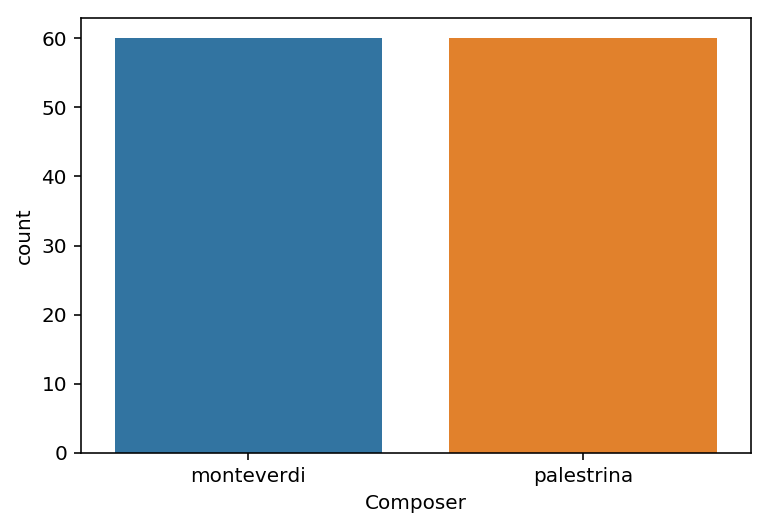

In [337]:
print(data.info(), '\n', data.isnull().sum(), '\n', sns.countplot(data['Composer']))

### Encoding Labels (Enumerations)

In [338]:
label_quality = LabelEncoder()

# data['Name'] = label_quality.fit_transform(data['Name'])
data['Time Signature'] = label_quality.fit_transform(data['Time Signature'])
data['Tempo'] = label_quality.fit_transform(data['Tempo'])
# data['Harmony'] =  label_quality.fit_transform(data['Hamrony'])
data['Instruments'] = label_quality.fit_transform(data['Instruments'])
data['Tonnetz'] =  label_quality.fit_transform(data['Tonnetz'])
# data['Style'] =  label_quality.fit_transform(data['Style'])
data['Composer'] =  label_quality.fit_transform(data['Composer'])


###  Data DROPING :

In [339]:
data = data.drop(columns='Name')
data = data.drop(columns='Style')
# data = data.drop(columns='Composer')
data = data.drop(columns='Trajectory Type')
data = data.drop(columns='Instruments')
data = data.drop(columns='Number Of Instr')
data = data.drop(columns='Tempo')
data = data.drop(columns='Time Signature')

# data = data.drop(columns='Kalz Centrality')
# data = data.drop(columns='Global Clustering')
# data = data.drop(columns='Square Clustering')
# data = data.drop(columns='Harmonic Centrality')
# data = data.drop(columns='Closeness Centrality')
# data = data.drop(columns='Betweenness Centrality')

data.head()

,Composer,Kalz Centrality,Global Clustering,Square Clustering,Harmonic Centrality,Betweenness Centrality,Closeness Centrality,Tonnetz
0,0,0.139499,0.289683,0.356335,17.097605,0.100345,0.079668,3
1,0,0.156751,0.303061,0.352225,15.940873,0.099944,0.102825,3
2,0,0.185616,0.288750,0.460167,12.809524,0.048665,0.110267,3
3,0,0.162015,0.317647,0.571193,14.226732,0.122970,0.080627,3
4,0,0.153020,0.275000,0.311616,17.672691,0.129344,0.109009,3


1    60
0    60
Name: Composer, dtype: int64 
 AxesSubplot(0.125,0.125;0.775x0.755)


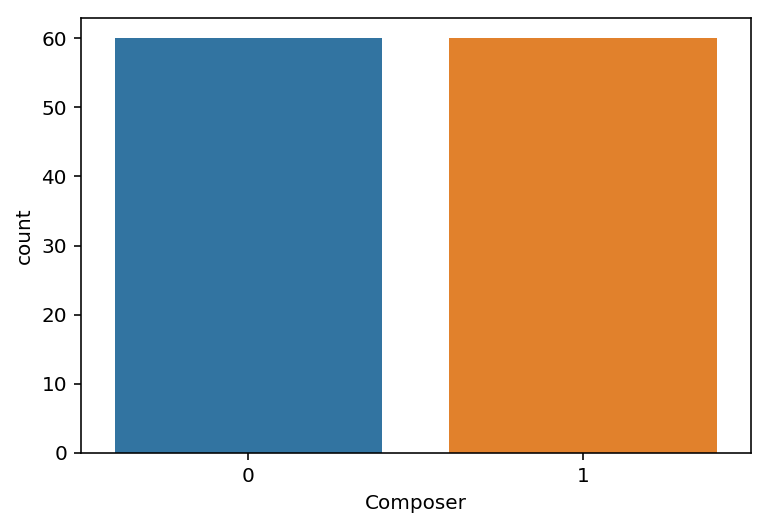

In [340]:
print(data['Composer'].value_counts(), '\n', sns.countplot(data['Composer']))

In [341]:
# Now lets separate the dataset as response variable and feature variables
X = data.drop('Composer', axis = 1)
y = data['Composer']

# Train and TEst Splitting of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

# Apply Standard Scalling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


## Random Forest Classifier

In [342]:
rfc = RandomForestClassifier(n_estimators=1000, criterion="entropy")
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print('\033[1m' + 'RANDOM FORREST CLASSIFIER : \n\n' + 'Classification Report : \n\n'
+ '\033[0m', classification_report(y_test, pred_rfc), '\n\n' 
+ '\033[1m' + 'Confusion Matrix : \n\n'
+ '\033[0m', confusion_matrix(y_test, pred_rfc), '\n\n'
+ '\033[1m' + 'Cross Validation : \n\n'
+ '\033[0m', cross_val_score(rfc, X_test, y_test, cv=5), '\n\n')

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
etc.fit(X_train, y_train)
pred_etc = etc.predict(X_test)

print('\033[1m' + 'EXTRA TREES CLASSIFIER : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_etc), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_etc), '\n')

RANDOM FORREST CLASSIFIER : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.94      0.89      0.91        18

   micro avg       0.92      0.92      0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36
 

Confusion Matrix : 

 [[17  1]
 [ 2 16]] 

Cross Validation : 

 [1.         1.         0.75       0.83333333 1.        ] 


EXTRA TREES CLASSIFIER : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.83      0.83      0.83        18

   micro avg       0.83      0.83      0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36
 

Confusion Matrix : 

 [[15  3]
 [ 3 15]] 



In [343]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred_dtc = dtc.predict(X_test)

print('\033[1m' + 'DECISION TREE CLASSIFIER : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_dtc), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_dtc), '\n')

from sklearn.ensemble import GradientBoostingClassifier

gtb = GradientBoostingClassifier(n_estimators=500)
gtb.fit(X_train, y_train)
pred_gtb = gtb.predict(X_test)  

print('\033[1m' + 'GRADIENT TREE BOOSTING CLASSIFIER : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_gtb), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_gtb), '\n')

DECISION TREE CLASSIFIER : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       0.85      0.94      0.89        18

   micro avg       0.89      0.89      0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36
 

Confusion Matrix : 

 [[15  3]
 [ 1 17]] 

GRADIENT TREE BOOSTING CLASSIFIER : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.79      0.83      0.81        18

   micro avg       0.81      0.81      0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.81      0.81      0.81        36
 

Confusion Matrix : 

 [[14  4]
 [ 3 15]] 



## SVM Classifier

In [344]:
svm = SVC(gamma='scale', kernel='rbf', probability=True)
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

print('\033[1m' + 'SUPPORT VECTOR MACHINE : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_svm), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_svm), '\n')

SUPPORT VECTOR MACHINE : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.85      0.94      0.89        18
           1       0.94      0.83      0.88        18

   micro avg       0.89      0.89      0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36
 

Confusion Matrix : 

 [[17  1]
 [ 3 15]] 



## Neural Network Classifier

In [345]:
mlpc = MLPClassifier(hidden_layer_sizes=(20, 20, 20,20,20), max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

print('\033[1m' + 'NEURAL NETWORK CLASSIFIER : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_mlpc), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_mlpc), '\n')

NEURAL NETWORK CLASSIFIER : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.73      0.89      0.80        18

   micro avg       0.78      0.78      0.78        36
   macro avg       0.79      0.78      0.77        36
weighted avg       0.79      0.78      0.77        36
 

Confusion Matrix : 

 [[12  6]
 [ 2 16]] 



## Linear and Non-Linear Regression

In [346]:
from sklearn import linear_model

reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)
reg.predict(X_test)

print('\033[1m' + 'LINEAR REGRESSION : \n\n' + 'Attribute Coefficients : \n')
print('\033[0m', reg.coef_, '\n')
print('\033[1m' + 'Score : \n')
print('\033[0m', reg.score(X_test, y_test))

reg = linear_model.LogisticRegression()
reg.fit(X_train, y_train)
reg.predict(X_test)

print('\033[1m' + 'LOGISTIC REGRESSION : \n\n' + 'Attribute Coefficients : \n')
print('\033[0m', reg.coef_, '\n')
print('\033[1m' + 'Score : \n')
print('\033[0m', reg.score(X_test, y_test))

LINEAR REGRESSION : 

Attribute Coefficients : 

 [ 0.11575461  0.101255   -0.18061503 -0.13208216  0.09835465 -0.0693568
  0.11423663] 

Score : 

 0.5641472571943117
LOGISTIC REGRESSION : 

Attribute Coefficients : 

 [[ 0.96744931  0.48435537 -1.29020875 -0.8095751   0.68077153 -0.63121314
   1.1015391 ]] 

Score : 

 0.9166666666666666


C:\Users\melki\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## k Neighbors Classifiers

In [347]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

print('\033[1m' + 'NEAREST NEIGHBOR : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_knn), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_knn), '\n\n')

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

print('\033[1m' + '3 NEAREST NEIGHBORS : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_knn), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_knn), '\n\n')

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

print('\033[1m' + '5 NEAREST NEIGHBORS : \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_knn), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_knn), '\n')

NEAREST NEIGHBOR : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.73      0.89      0.80        18

   micro avg       0.78      0.78      0.78        36
   macro avg       0.79      0.78      0.77        36
weighted avg       0.79      0.78      0.77        36
 

Confusion Matrix : 

 [[12  6]
 [ 2 16]] 


3 NEAREST NEIGHBORS : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.82      0.78      0.80        18

   micro avg       0.81      0.81      0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.81      0.81      0.81        36
 

Confusion Matrix : 

 [[15  3]
 [ 4 14]] 


5 NEAREST NEIGHBORS : 

Classification Report : 

               precision    recall  f1-score   support

           0       0.84      0.89      0.86      

## VOTING CLASSIFIER (Combining methods)

In [348]:
from sklearn.ensemble import VotingClassifier

vclf = VotingClassifier(estimators=[('knn', gtb), ('rf', etc), ('mlpc', mlpc)], voting='hard')
    
vclf.fit(X_train, y_train)
pred_vclf = vclf.predict(X_test)  

print('\033[1m' + 'VOTING CLASSIFIER : \n (Gradient Tree Boosting +  Extra Trees Classifier + Neural Networks) \n\n' + 'Classification Report : \n')
print('\033[0m', classification_report(y_test, pred_vclf), '\n')
print('\033[1m' + 'Confusion Matrix : \n')
print('\033[0m', confusion_matrix(y_test, pred_vclf), '\n')

VOTING CLASSIFIER : 
 (Gradient Tree Boosting +  Extra Trees Classifier + Neural Networks) 

Classification Report : 

               precision    recall  f1-score   support

           0       0.83      0.83      0.83        18
           1       0.83      0.83      0.83        18

   micro avg       0.83      0.83      0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36
 

Confusion Matrix : 

 [[15  3]
 [ 3 15]] 



### Print Encoding of Composers

In [158]:
print('0 = ', label_quality.inverse_transform([0]))
print('1 = ', label_quality.inverse_transform([1]))
print('2 = ', label_quality.inverse_transform([2]))
print('3 = ', label_quality.inverse_transform([3]))
print('4 = ', label_quality.inverse_transform([4]))
print('5 = ', label_quality.inverse_transform([5]))
print('6 = ', label_quality.inverse_transform([6]))
print('7 = ', label_quality.inverse_transform([7]))

0 =  ['Unknown']
1 =  ['mozart']


ValueError: y contains previously unseen labels: [2]

## Let's Plot some Stuff

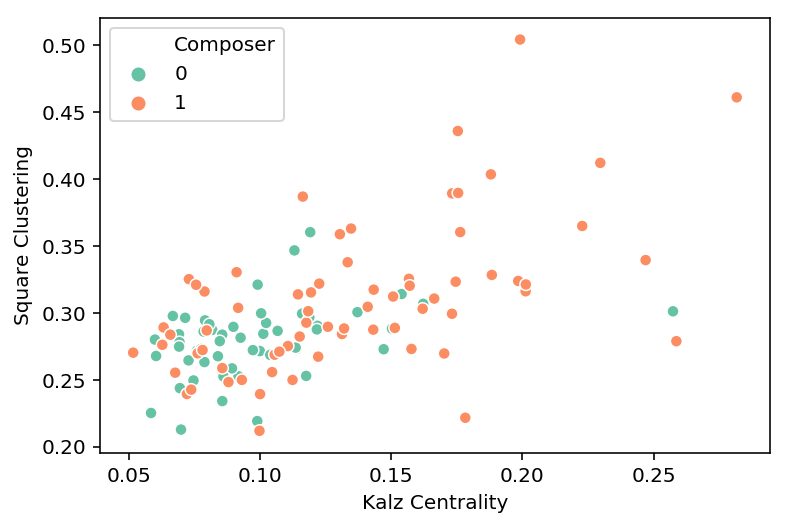

In [608]:
ax = sns.scatterplot(data['Kalz Centrality'], data['Square Clustering'], hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")


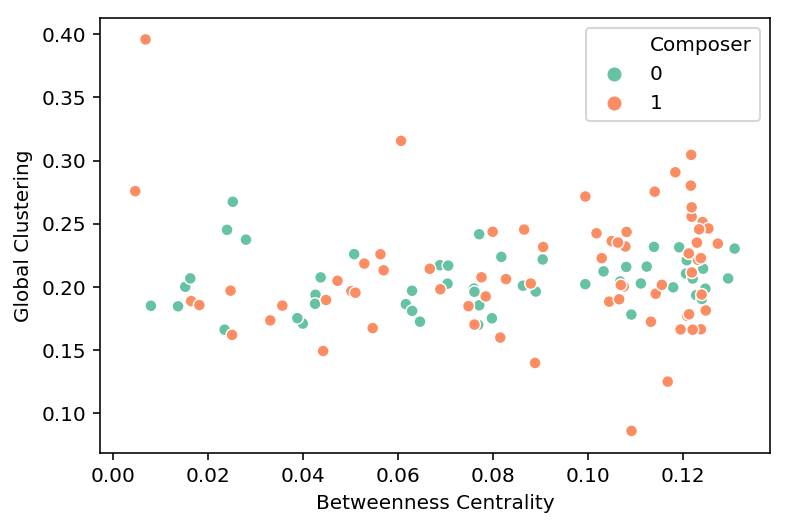

In [609]:
ax = sns.scatterplot(data['Betweenness Centrality'], data['Global Clustering'], hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")

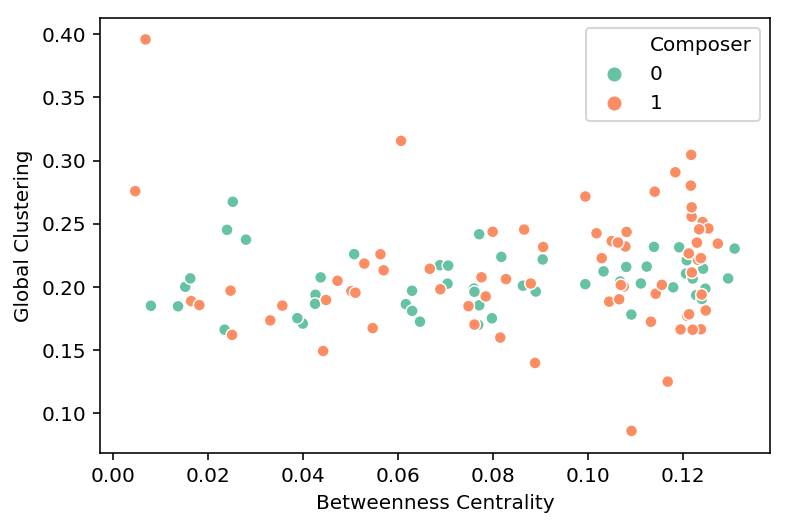

In [610]:
ax = sns.scatterplot(data['Betweenness Centrality'], data['Global Clustering'], hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")

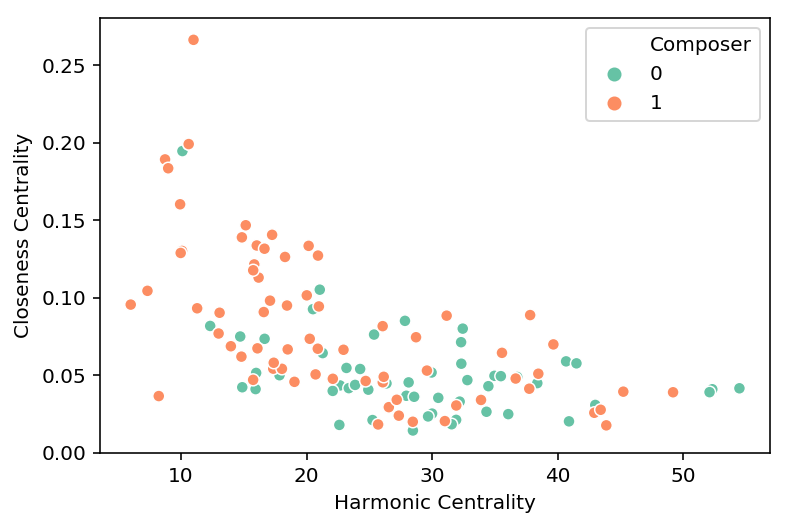

In [611]:
ax = sns.scatterplot(data['Harmonic Centrality'], data['Closeness Centrality'], hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")

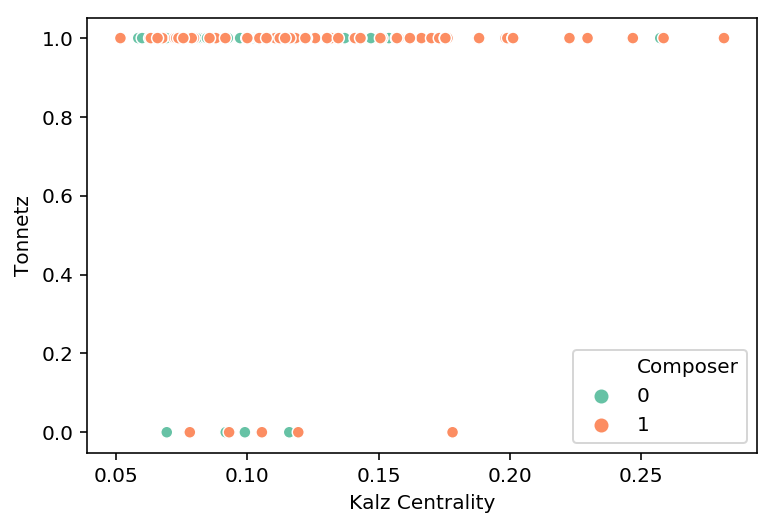

In [612]:
ax = sns.scatterplot(data['Kalz Centrality'], data['Tonnetz'],  hue=data['Composer'], palette="Set2", hue_norm=(0, 7),  legend="full")

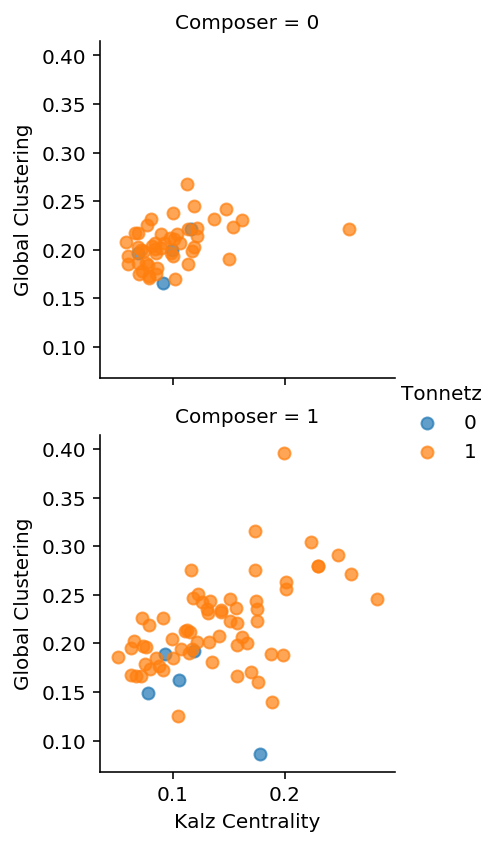

In [614]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(data, row='Composer', hue='Tonnetz')
g.map(plt.scatter, 'Kalz Centrality', 'Global Clustering', alpha=.7)
g.add_legend();